# Curso de Estadística Computacional con Python

![Portada](images/Portada.jpeg)

# Tabla de Contenido
- [Programación dinámica](#programación-dinámica)
    - [Optimzación Fibonnaci](#optimización-de-fibonacci)
        - [Optimización Especial](#optimización-especial)
        - [Código](#código)
    - [Caminos Aleatorios](#caminos-aleatorios)
        - [Resultados](#resultado-de-la-simulacion)
        - [Código](#códigos-del-borracho)
        - [Aporte solo pasos del borracho](#código-para-solo-observar-los-pasos-del-borracho)
- [Procesos Estocásticos](#procesos-estocásticos)
- [Monte Carlos](#monte-carlos)
- [Muestreo e Intervalos de Confianza](#muestro-e-intervalos-de-confianza)
- [Datos experimentales](#datos-experimentales)
- [Conclusiones](#conclusiones)


# Programación dinámica

**Programación dinámica:** Se escogió para esconder a patrocinadores gubernamentales el hecho que en realidad estaba haciendo Matemáticas. La frase Programación Dinámica es algo que ningún congresista puede oponerse. **Richard Bellman**

**Programación dinámica:**
- Subsestructura Óptima: Una solución global óptima se puede encontrar al combinar soluciones óptimas de subproblemas locales.
- Problemas empalmados: Una solución óptima que involucra resolver el mismo problema en varias ocasiones.

**Memoization:**
- La memorización es una técnica para guardar cómputos previos y evitar realizarlos nuevamente.
- Normalmente se utiliza un diccionario, donde las consultas se pueden hacer en O(1).
- Intercambia tiempo por espacio.

> Ventaja de consulta de los Sets y Dict de O(1).

## Optimización de Fibonacci

$$F_n = F_{n-1} + F_{n-2} \quad \forall~n > 2$$

![Fibonacci](images/Fibonnaci.png)

Pero el algoritmo recursivo es ineficiente, debido a que crece de manera exponencial el tiempo de cómputo.

> **Hint:** Para medir tiempo de ejecución desde consola (Mi sistema operativo es Windows usando Git Bash):
>```shell
>time python src/programacion_dinamica-1.py
>```
Aprovechando el tiempo de consulta de los diccionarios optimizamos el tiempo de ejecución para calcular un número $n$ de Fibonacci.

>**Hint:** Para aumentar el tamaño de recursión y no sea un límite, añadimos la siguiente línea de código:
>```python
>sys.setrecursionlimit(10002)
>```

> Sitio Web para observar como funciona ambos algoritmos: [Dynamic Programming (Fibonacci)](https://www.cs.usfca.edu/~galles/visualization/DPFib.html)


### Optimización Especial

In [2]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

### Código 
[**File**: programacion_dinamica-1.py](src/programacion_dinamica-1.py)

In [3]:
import sys
from functools import lru_cache

def fibonacci_recursivo(n):
    if n == 0 or n == 1:
        return 1

    return fibonacci_recursivo(n - 1) + fibonacci_recursivo(n - 2)


def fibonacci_dinamico(n, memo = {}):
    if n == 0 or n == 1:
        return 1

    try:
        return memo[n]
    except KeyError:
        # Si no esta en el diccionario, lo calculamos y lo guardamos
        resultado = fibonacci_dinamico(n - 1, memo) + fibonacci_dinamico(n - 2, memo)
        memo[n] = resultado

        return resultado

@lru_cache(maxsize=None)
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

sys.setrecursionlimit(10002)
n = int(input('Escoge un numero: '))
# resultado = fibonacci_recursivo(n)
resultado = fib(n)
# resultado = fibonacci_dinamico(n)
print(f"Number: {n} -> Result: {resultado}")

Number: 1 -> Result: 1


## Caminos Aleatorios

> Caminos Aleatorios:
> - Es un tipo de simulación que elige aleatoriamente una decisión dentro de un conjunto de decisiones válidas.
> - Se utiliza en muchos campos del conocimiento cuando los sistemas no son deterministas e incluyen elementos de aleatoriedad.

La idea viene dado por el movimiento browniano, este es el movimiento aleatorio de partículas suspendidas en un fluido (líquido o gas) debido a colisiones con moléculas del medio. Este fenómeno fue observado por Robert Brown en 1827 y es un ejemplo de un proceso estocástico

### Entendiendo la aleatoriedad con Python

Se dividio en 3 clases:
- ¿Qué es un borracho? *Borracho*
- ¿Dónde se mueve este borracho? *Campo*
- Concepto abstracto a tráves de un objeto: *Coordenada*.

**Borracho**, toma cambios en alguna de las coordenadas de forma aleatoria. Cada posible paso tiene igual probabilidad de ocurrencia.

In [4]:
import random

class Borracho:

    def __init__(self, nombre):
        self.nombre = nombre


class BorrachoTradicional(Borracho):

    def __init__(self, nombre):
        super().__init__(nombre)

    def camina(self):
        # Igual probabilidad seleccionar cualquier paso
        return random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])

**Campo**, muestra (gráfica) los pasos del borracho y limita el área donde se mueve.

In [5]:
class Campo:

    def __init__(self):
        self.coordenadas_de_borrachos = {}

    def anadir_borracho(self, borracho, coordenada):
        """
        Add Borracho al campo
        """
        self.coordenadas_de_borrachos[borracho] = coordenada

    def mover_borracho(self, borracho):
        """
        Mueve el borracho modificando sus coordenadas
        """
        # Genera un paso
        delta_x, delta_y = borracho.camina()
        # Obtiene las coordenadas del borracho
        coordenada_actual = self.coordenadas_de_borrachos[borracho]
        # Crea una nueva coordena
        nueva_coordenada = coordenada_actual.mover(delta_x, delta_y)
        # Modifica la coordena
        self.coordenadas_de_borrachos[borracho] = nueva_coordenada

    def obtener_coordenada(self, borracho):
        """
        Get Coordenada
        """
        return self.coordenadas_de_borrachos[borracho]

**Coordenada**, crea el marco de referencia para el *Borracho* y el *Campo*. Nos permite también calcular la distancia entre una coordena y otra.

In [6]:
class Coordenada:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def mover(self, delta_x, delta_y):
        """
        Retorna una nueva Coordenada
        """
        return Coordenada(self.x + delta_x, self.y + delta_y)

    def distancia(self, otra_coordenada):
        """
        Calcula la distancia Euclidiana
        """
        delta_x = self.x - otra_coordenada.x 
        delta_y = self.y - otra_coordenada.y 

        return (delta_x**2 + delta_y**2)**0.5

> La simulación genera $n$ cantidad de pasos del borracho. Siempre que hacemos aleatoriedad ejecutamos $m$ simulaciones para $n$ pasos. Para luego obtener las estadísticas necesarias para proponer los resultados de esas observaciones.

In [7]:
# Librerias a emplear
from src.borracho import BorrachoTradicional
from src.campo import Campo 
from src.coordenada import Coordenada 

# Para graficar
from bokeh.plotting import figure, show

In [8]:
def caminata(campo, borracho, pasos):
    # Coordinate init
    inicio = campo.obtener_coordenada(borracho)

    for _ in range(pasos):
        # Move borracho
        campo.mover_borracho(borracho)

    # Return distance between origin and end
    return inicio.distancia(campo.obtener_coordenada(borracho))

In [9]:
def simular_caminata(pasos, numero_de_intentos, tipo_de_borracho):
    
    # Add Borracho
    borracho = tipo_de_borracho(nombre='Rigo')
    # Crear origen
    origen = Coordenada(0, 0)
    # Save distance
    distancias = []

    for _ in range(numero_de_intentos):
        # Creo el campo
        campo = Campo()
        # Ubico el borracho
        campo.anadir_borracho(borracho, origen)
        # Caminar y devuelve la distancia caminda desde el origen
        simulacion_caminata = caminata(campo, borracho, pasos)
        # Save
        distancias.append(round(simulacion_caminata, 1))

    return distancias

In [10]:
def graficar(x, y):
    """
    Plot n vs Distancia media
    """
    grafica = figure(title='Camino aleatorio', x_axis_label='pasos', 
                     y_axis_label='distancia')
    grafica.line(x, y, legend_label='distancia media')

    show(grafica)

In [11]:
def main(distancias_de_caminata, numero_de_intentos, tipo_de_borracho):

    # Save mean distance
    distancias_media_por_caminata = []

    for pasos in distancias_de_caminata:
        distancias = simular_caminata(pasos, numero_de_intentos, tipo_de_borracho)
        # Media
        distancia_media = round(sum(distancias) / len(distancias), 4)
        # Maxima
        distancia_maxima = max(distancias)
        # Minima
        distancia_minima = min(distancias)
        # Save
        distancias_media_por_caminata.append(distancia_media)
        print(f'{tipo_de_borracho.__name__} caminata aleatoria de {pasos} pasos')
        print(f'Media = {distancia_media}')
        print(f'Max = {distancia_maxima}')
        print(f'Min = {distancia_minima}')

    graficar(distancias_de_caminata, distancias_media_por_caminata)

In [12]:
# Number of steps -> n
distancias_de_caminata = [10, 100, 1000, 10000]
# Number of Simulations -> m
numero_de_intentos = 100

main(distancias_de_caminata, numero_de_intentos, BorrachoTradicional)

BorrachoTradicional caminata aleatoria de 10 pasos
Media = 2.887
Max = 7.1
Min = 0.0
BorrachoTradicional caminata aleatoria de 100 pasos
Media = 8.723
Max = 21.3
Min = 0.0
BorrachoTradicional caminata aleatoria de 1000 pasos
Media = 29.163
Max = 70.7
Min = 6.3
BorrachoTradicional caminata aleatoria de 10000 pasos
Media = 90.969
Max = 226.9
Min = 15.0


### Resultado de la Simulacion

![Distancias Medias](images/camino_aleatorio.png)

### Códigos del Borracho

|Name File | Link |
|-|-|
|Borracho| [Borracho](src/borracho.py) |
|Campo| [Campo](src/campo.py) |
|Coordenadas | [Coordenadas](src/coordenada.py)|
|Simulación | [Simulation](src/camino_aleatorio.py)|

### Código para solo observar los pasos del borracho

> Nota: Aportado por un estudiante de la comunidad de Platzi. (Angel Armando Martínez Blanco)

In [13]:
from src.borracho import BorrachoTradicional
from src.coordenada import Coordenada
from src.campo import Campo

from bokeh.plotting import figure, show

In [14]:
def graficar(x, y):
    figura = figure()
    figura.line(x, y)
    show(figura)

In [15]:
def ejecutar_caminata(campo, borracho, distancia):
    x_arreglo = []
    y_arreglo = []
    x_arreglo.append(campo.obtener_coordenada(borracho).x)
    y_arreglo.append(campo.obtener_coordenada(borracho).y)
    for _ in range(distancia):
        campo.mover_borracho(borracho) #se actualiza las coordenadas del borracho
        x_arreglo.append(campo.obtener_coordenada(borracho).x)
        y_arreglo.append(campo.obtener_coordenada(borracho).y)
    graficar(x_arreglo, y_arreglo)

In [16]:
def main(distancia, inicio, borracho):
    campo = Campo()
    campo.anadir_borracho(borracho, inicio) #poner un borracho en origen
    ejecutar_caminata(campo, borracho, distancia)

In [17]:
distancia = 100000
inicio = Coordenada(0,0)
borracho = BorrachoTradicional('Rigo')
main(distancia, inicio, borracho)

![Resultado Caminta Borracho](images/borracho_caminata.png)

# Programas Estocásticos

- Un programa es determinístico si cuando se corre con el mismo input produce el mismo output.
- Los programas determinísticos son muy importantes, pero existen problemas que no pueden resolverse de esa manera.
- La programación estocástica permite introducir aleatoriedad a nuestros programas para crear simulaciones que permiten resolver otro tipo de problemas.

> Los programas estocásticos se aprovechan de que las distribuciones probabilísticas de un problema se conocen o pueden ser estimadas.

## Probabilidades

- La probabilidad es una medida de la certidumbre asociada a un evento o suceso futuro y suele expresarse como un número entre 0 y 1.
- Una probabilidad de 0 significa que un suceso jamás sucederá.
- Una probabilidad de 1 significa que un suceso está garantizado de suceder en el futuro.
- Al hablar de probabilidad preguntamos qué fracción de todos los posibles eventos tiene la propiedad que buscamos.
- Por eso es importante poder calcular todas las posibilidades de un evento para entender su probabilidad.
- La probabilidad de que un evento suceda y de que no suceda es siempre 1.

Ley del Complemento:
$$P(A) + P(~A) = 1$$ 

Ley multiplicativa:
$$P(A \text{y} B) = P(A) * P(B)$$



Ley aditiva 
Mutuamente exclusivos:
$$P(A \text{o} B) = P(A) + P(B)$$
No exclusiva:
$$P(A \text{o} B) = P(A) + P(B) - P(A \text{y} B)$$

In [18]:
import random

In [19]:
def tirar_dado(numero_de_tiros):

    secuencia_de_tiros = []

    for _ in range(numero_de_tiros):
        tiro = random.choice([1, 2, 3, 4, 5, 6])
        secuencia_de_tiros.append(tiro)

    return secuencia_de_tiros

In [26]:
def main(numero_de_tiros, numero_de_intentos):
    
    tiros = []
    for _ in range(numero_de_intentos):
        secuencia_de_tiros = tirar_dado(numero_de_tiros)
        tiros.append(secuencia_de_tiros)
    

    tiros_con_1 = 0
    for tiro in tiros:
        # Para obtener el complemento
        # if 1 not in tiro:
        if 1 in tiro:
            tiros_con_1 += 1

    probabilidad_tiros_con_1 = tiros_con_1 / numero_de_intentos
    print(f"Probabilidad de obtener por lo" +
          f" menos un 1 en {numero_de_tiros}" +
          f" tiros = {probabilidad_tiros_con_1}")

In [27]:
numero_de_tiros = int(input('Cuantas tiros del dado: '))
numero_de_intentos = int(input('Cuantas veces correra la simulacion: '))

main(numero_de_tiros, numero_de_intentos)

Probabilidad de obtener por lo menos un 1 en 1 tiros = 0.147


In [22]:
# Probabilidad de no obtener un 1
(5/6)**10

0.1615055828898458

In [23]:
# Probabilidad de obtener al menos un 1
1 - (5/6)**10

0.8384944171101543

In [24]:
## Ejecutar código directamente
%run src/probabilidades.py

Probabilidad de no obtener por lo menos un 1 en 1 tiros = 0.824


#### Reto 
> Obtener la probabilidad de obtener un 12 al tirar 2 dados

La posicion más justa es tener todas las posibles combinaciones y de ahi elegir la tirada. Eligiendo una única vez por dados para luego sumar no es muy realista, serían como momentos separados.

In [28]:
def reto(numero_de_tiros, numero_de_intentos):
    
    all_valores = [2,3,4,5,6,7,3,4,5,6,7,8,4,
                   5,6,7,8,9,5,6,7,8,9,10,6,7,
                   8,9,10,11,7,8,9,10,11,12]
    
    tiros = []
    for _ in range(numero_de_intentos):
        secuencia_de_tiros = []
        for _ in range(numero_de_tiros):
            tiro = random.choice(all_valores)
            secuencia_de_tiros.append(tiro)

        tiros.append(secuencia_de_tiros)

    tiros_con_12 = 0
    for tiro in tiros:
        if 12 in tiro:
            tiros_con_12 += 1
    
   
    probabilidad_tiros_con_1 = tiros_con_12 / numero_de_intentos
    print(f"Probabilidad de obtener por lo" +
          f" menos un 12 en {numero_de_tiros}" +
          f" tiros = {probabilidad_tiros_con_1}")

In [31]:
numero_de_tiros = int(input('Cuantas tiros del dado: '))
numero_de_intentos = int(input('Cuantas veces correra la simulacion: '))

reto(numero_de_tiros, numero_de_intentos)

Probabilidad de obtener por lo menos un 12 en 10 tiros = 0.24735


## Inferencia Estadística

- Con las simulaciones podemos calcular las probabilidades de eventos complejos sabiendo las probabilidades de eventos simples.
- ¿Qué pasa cuando no sabemos las probabilidades de los eventos simples?
- Las técnicas de la Inferencia Estadística nos permiten inferir/concluir las propiedades de una población a partir de una muestra aleatoria.

> El principio guía de la Inferencia Estadística es que una muestra aleatoria tiende a exhibir las mismas propiedades que la población de la cual fue extraída. **John Guttag**

### Proceso

De una **Población** obtenemos unas *muestras* representativas de forma aleatoria de la cual podemos obtener **conclusiones**.

- Muestro simplea aleatorio: tomamos de manera aleatoria muestras de las población

Esta idea válida proviene de la **Ley de los grandes números** donde en pruebas independientes repetidas con la misma probabilidad *p* de un resultado, la fracción de desviaciones de *p* converge a cero conforme las cantidad de pruebas se acerca al infinito. 

$$P\left( 
    \lim_{n \to \infty} \bar{X}_n = \mu
\right) = 1$$

### Falacia del apostador

- La falacia del apostador señala que después de un evento extremo, ocurrirán eventos menos extremos para nivelar la media.

- La regresión a la media señala que después de un evento aleatorio extremo, el siguiente evento probablemente será menos extremo.

In [1]:
import math
import random

### Media

- Es una medida de tendencia central.
- Comúnmente es conocida como el promedio.
- La media de una población se denota con el símbolo $$\mu = \sum_n x_n ~ p(x_n),$$ si la distribución es discreta. La media de una muestra se denota con $$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i.$$

In [2]:
def media(X):
    return sum(X) / len(X)

### Varianza

- La varianza mide qué tan propagados se encuentran un conjunto de valores aleatorios de su media.
- Mientras que la media nos da una idea de dónde se encuentran los valores, la varianza nos dice que tan dispersos se encuentran.
- La varianza siempre debe entenderse con respecto a la media.

$$\text{VAR}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2$$

### Desviación estándar
- La desviación estándar es la raíz cuadrada de la varianza.
- Nos permite entender, también, la propagación y se debe entender siempre relacionado a la media.
- La ventaja sobre la varianza es que la desviación estándar está en las mismas unidades que la media.

$$\sigma = \sqrt{ \sum_{i=1}^{n} p_i(x_i - \mu)^2}$$

In [3]:
def varianza(X):
    mu = media(X)

    acumulador = 0
    for x in X:
        acumulador += (x - mu)**2

    return acumulador / len(X)

In [4]:
def desviacion_estandar(X):
    return math.sqrt(varianza(X))

In [5]:
X = [random.randint(9, 12) for i in range(20)]
mu = media(X)
Var = varianza(X)
sigma = desviacion_estandar(X)

print(f'Arreglo X: {X}')
print(f'Media = {mu}')
print(f'Varianza = {Var}')
print(f'Desviacion estandar = {sigma}')

Arreglo X: [11, 9, 9, 11, 10, 11, 10, 9, 10, 9, 10, 12, 10, 9, 11, 10, 12, 9, 9, 11]
Media = 10.1
Varianza = 0.9900000000000002
Desviacion estandar = 0.9949874371066201


## Distribución Normal

- Es una de las distribuciones más recurrentes en cualquier ámbito.
- Se define completamente por su media y su desviación estándar.
- Permite calcular intervalos de confianza con la regla empírica.

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)$$

### Regla empírica

También conocida como la regla 68-95-99.7. Señala cuál es la dispersión de los datos en una distribución normal a uno, dos y tres sigmas. Permite calcular probabilidades con la densidad de la distribución normal. 

$$\text{Pr}(\mu - 1\sigma \le X \le \mu + 1\sigma) \approx 0.6827$$
$$\text{Pr}(\mu - 2\sigma \le X \le \mu + 2\sigma) \approx 0.9545$$
$$\text{Pr}(\mu - 3\sigma \le X \le \mu + 3\sigma) \approx 0.9973$$

![Portada](images/empiric_distr.png)

# Monte Carlos

## ¿Qué son las Simulaciones de Montecarlo?

Permite crear simulaciones para predecir el resultado de un problema, además de convertir problemas determinísticos en problemas estocásticos.

Es utilizado en gran diversidad de áreas, desde la ingeniería hasta la biología y el derecho.

In [6]:
import random
import collections

In [7]:
## Datos
PALOS = ['espada', 'corazon', 'rombo', 'trebol']
VALORES = ['as', '2', '3', '4', '5', '6', '7', '8', 
           '9', '10', 'jota', 'reina', 'rey']

In [8]:
def crear_baraja():
    barajas = []
    for palo in PALOS:
        for valor in VALORES:
            barajas.append((palo, valor))

    return barajas

In [19]:
def obtener_mano(barajas, tamano_mano):
    
    mano = random.sample(barajas, tamano_mano)
    
    return mano

In [25]:
def main(tamano_mano, intentos):
    barajas = crear_baraja()

    manos = []
    for _ in range(intentos):
        mano = obtener_mano(barajas, tamano_mano)
        manos.append(mano)

    pares = 0
    for mano in manos:
        valores = []
        for carta in mano:
            ## Save value of the card
            valores.append(carta[1])
        
        ## Count the number of times a value is repeated
        counter = dict(collections.Counter(valores))
        for val in counter.values():
            # Almenos un par
            if val == 2:
            # Para una tercia
            # if val == 3:
                pares += 1
                break

    probabilidad_par = pares / intentos
    print("La probabilidad de obtener un par en una" +
    # print("La probabilidad de obtener una tercia en una" +
          f" mano de {tamano_mano} barajas es {probabilidad_par}")

#### Reto

In [54]:
def main_reto(tamano_mano, intentos):
    barajas = crear_baraja()

    manos = []
    for _ in range(intentos):
        mano = obtener_mano(barajas, tamano_mano)
        manos.append(mano)

    valoresNum = {val: i for i, val in enumerate(VALORES, start=1)}
    escalera = 0
    for mano in manos:
        manoNum = [valoresNum[carta[1]] for carta in mano]
        valores = sorted(manoNum)  # Obtener y ordenar los valores de la mano
        # Comprobar si hay una escalera
        if len(valores) == tamano_mano and valores == list(range(valores[0], 
                                                valores[0] + tamano_mano)):
            escalera += 1

    probabilidad_escalera = escalera / intentos
    print("La probabilidad de obtener una escalera en una" +
          f" mano de {tamano_mano} cartas es {probabilidad_escalera}")

In [56]:
tamano_mano = int(input('De cuantas barajas sera la mano: '))
intentos = int(input('Cuantos intentos para calcular la probabilidad: '))

main(tamano_mano, intentos)

La probabilidad de obtener un par en una mano de 5 barajas es 0.489


In [57]:
tamano_mano = int(input('De cuantas barajas sera la mano: '))
intentos = int(input('Cuantos intentos para calcular la probabilidad: '))

main_reto(tamano_mano, intentos)

La probabilidad de obtener una escalera en una mano de 5 cartas es 0.005


### Cálculo de PI

Calcularemos PI con puntos al azar esparcidos en un plano cartesiano utilizando los scripts de desviación estándar y media que creados anteriormente. Queremos tener un 95% de certeza, entonces para ello realizaremos el cálculo para 1/2 del área de un circulo, optimizando nuestros recursos.

$$ \text{Area Cuadrado} = b \cdot h$$

$$ \text{Area Circulo} = \pi \cdot r^2$$

In [14]:
import random
import math
from src.estadisticas import desviacion_estandar, media

In [62]:
def aventar_agujas(numero_de_agujas):
    adentro_del_circulo = 0

    for _ in range(numero_de_agujas):
        x = random.random() * random.choice([-1, 1])
        y = random.random() * random.choice([-1, 1])
        distancia_desde_el_centro = math.sqrt(x**2 + y**2)

        if distancia_desde_el_centro <= 1:
            adentro_del_circulo += 1

    # La variable adentro_del_circulo representa 1/4 del área del círculo,
    # y como solo utilizaremos 1/2 vamos a multiplicarlo por 2.
    return (2 * adentro_del_circulo) / numero_de_agujas

In [63]:
def estimacion(numero_de_agujas, numero_de_intentos):
    estimados = []
    for _ in range(numero_de_intentos):
        estimacion_pi = aventar_agujas(numero_de_agujas)
        estimados.append(estimacion_pi)

    media_estimados = media(estimados)
    sigma = desviacion_estandar(estimados)

    # La variable media_estimados tiene los resultados sobre 1/2 del área del
    # círculo. Para obtener la estimación de PI completo lo vamos a multiplicar por 2.
    print(f"Est={round(media_estimados, 5) * 2}, " +
          f"sigma={round(sigma, 5)}, "  +
          f"agujas={numero_de_agujas}")

    return (media_estimados, sigma)

In [66]:
def estimar_pi(precision, numero_de_intentos):
    numero_de_agujas = 1000
    sigma = precision

    while sigma >= precision / 1.96:
        media, sigma = estimacion(numero_de_agujas, numero_de_intentos)
        numero_de_agujas *= 2

    return media*2

In [67]:
estimar_pi(0.01, 1000)

Est=3.14336, sigma=0.02608, agujas=1000
Est=3.14218, sigma=0.01803, agujas=2000
Est=3.14028, sigma=0.01327, agujas=4000
Est=3.1414, sigma=0.00933, agujas=8000
Est=3.14182, sigma=0.00655, agujas=16000
Est=3.14164, sigma=0.00453, agujas=32000


3.1416414999999995

# Muestro e Intervalos de Confianza

## Muestreo 

Hay ocasiones en la que no tenemos acceso a toda la población que queremos explorar. Uno de los grandes descubrimientos de la estadística es que las muestras aleatorias tienden a mostrar las mismas propiedades de la población objetivo. El tipo de muestreo que hemos hecho hasta ahora es muestreo probabilístico.

En un muestreo aleatorio cualquier miembro de la población tiene la misma probabilidad de ser escogido. En un muestreo **estratificado** tomamos en consideración las características de la población para partirla en subgrupos y luego tomamos muestras de cada subgrupo, esto incrementa la probabilidad de que el muestreo sea representativo de la población.

## Teorema del límite central

Es uno de los teoremas más importantes de la estadística. Establece que muestras aleatorias de cualquier distribución van a tener una distribución normal. Permite entender cualquier distribución como la distribución normal de sus medias y eso nos permite aplicar todo lo que sabemos de distribuciones normales.

Mientras más muestras obtengamos, mayor será la similitud con la distribución normal Mientras la muestra sea de mayor tamaño, la desviación estándar será menor.

![Sampling_rule](images/samping_rule.png)

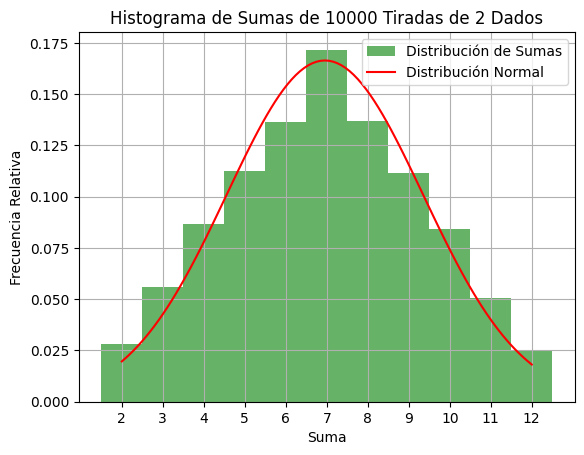

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def tirar_dados(n_tiradas):
    # Simula la tirada de 2 dados y devuelve las sumas
    resultado = [np.random.randint(1, 7) + np.random.randint(1, 7) for _ in range(n_tiradas)]
    return resultado

def graficar_histograma(data, n_tiradas):
    # Crea un histograma de los resultados
    plt.hist(data, bins=np.arange(2, 14) - 0.5, density=True, 
             alpha=0.6, color='g', label='Distribución de Sumas')
    
    # Graficar la distribución normal
    mu = np.mean(data)
    sigma = np.std(data)
    x = np.linspace(2, 12, 100)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    plt.plot(x, y, color='red', label='Distribución Normal')

    # Personalizar el gráfico
    plt.title(f'Histograma de Sumas de {n_tiradas} Tiradas de 2 Dados')
    plt.xlabel('Suma')
    plt.ylabel('Frecuencia Relativa')
    plt.xticks(range(2, 13))
    plt.legend()
    plt.grid()
    plt.show()

def main():
    n_tiradas = 10000  # Número de tiradas de dados
    resultados = tirar_dados(n_tiradas)
    graficar_histograma(resultados, n_tiradas)

main()

# Datos Experimentales

### ¿Cómo trabajar con datos experimentales?

Los datos experimentales son aquellos que se generan a través del método científico.

- Con el método científico es necesario comenzar con una teoría o hipótesis sobre el resultado al que se quiere llegar.
- Basado en la hipótesis se debe crear un experimento para validad o falsear la hipótesis.
- Se valida o falsea una hipótesis midiendo la diferencia entre las mediciones experimentales y aquellas mediciones predichas por la hipótesis.

### El método científico y la hipótesis

¿Cómo se vinculan la teoría y la experimentación en el método científico? El punto de partida es siempre una hipótesis o teoría, posibilitando la creación de experimentos diseñados objetivamente para su comprobación. En este proceso, es fundamental abordar la experimentación sin prejuicios, buscando la verdad de la hipótesis sin intentar forzar los resultados a favor de nuestras creencias iniciales.

### Diseño y ejecución de experimentos

¿Cuál es la importancia del diseño y ejecución de experimentos? Una vez formulada la hipótesis, se procede a diseñar un experimento que permita confirmarla o refutarla. La ejecución de dicho experimento proporciona datos que, al compararlos con las predicciones teóricas, nos indican si la teoría se sostiene ante la evidencia empírica o si, por el contrario, debe ser cuestionada o incluso descartada.

### Comparación entre teoría y datos experimentales

¿Qué sucede cuando se comparan los datos experimentales con las teorías? A lo largo de la historia, muchas teorías han sido confirmadas a través de experimentos, como es el caso de la mecánica cuántica y la teoría general de la relatividad. Sin embargo, el hecho de que estas teorías sean incompatibles entre sí, plantea desafíos significativos e invita a profundizar en el conocimiento y la investigación científica.

## Regresión Lineal

La regresión lineal nos permite aproximar una función a un conjunto de datos obtenidos de manera experimental. No necesariamente permite aproximar funciones lineales, sino que sus variantes permiten aproximar cualquier **función polinómica**.

In [69]:
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 2, 3, 5, 4, 6, 8, 7, 9])

coeffs = np.polyfit(x, y, 1)
print(coeffs)

[0.96666667 1.13333333]


In [70]:
m = coeffs[0]
b = coeffs[1]
est_y = (m * x) + b

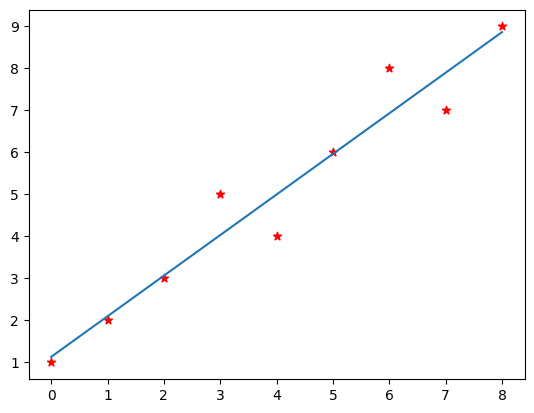

In [73]:
import matplotlib.pyplot as plt
plt.plot(x, est_y)
plt.scatter(x, y, color='red', marker='*')
plt.show()

# Atención

Este tutorial es basado en el  Curso de Estadística Computacional con Python de Platzi.